In [10]:
import pandas as pd
import pandana
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import tmap
import geodatasets

In [11]:
zest = pd.read_csv('./data/neighborhood_zestimate.csv')

In [12]:
zest = zest[zest['City'] == 'Chicago']


In [13]:


path = "data/"
file_name = ['chicago_2019.csv', 'chicago_2020.csv', 'chicago_2021.csv', 'chicago_2022.csv']
filenames =[path + file for file in file_name]
#print(filenames)

""" 
    Modifies: df
    Read Me: Basic File Merger, to combine the 2019-2022 census data
    Requires: A file path list
"""
def fileMerger(path):
    df1 = pd.read_csv(path[0])
    df2 = pd.read_csv(path[1])
    df_merged = df1.merge(df2, how='outer')
    for file in path[2:]:
        temp = pd.read_csv(file)
        df_merged = df_merged.merge(temp, how='outer')
    return df_merged

crime = fileMerger(filenames)

In [14]:
import requests
url = "https://www.chicagotribune.com/2002/12/04/chicago-communities-17/"
text = requests.get(url).text

tables = pd.read_html(url)
print("Found {} tables in {}".format(len(tables), url))
hash = {"Community Area" : ["nan", "nan"], "Community Name": ["NaN", "NaN"]}

community = tables[1]

for item in (community):
    # community index
    if(item == 0 or item == 2):
        for i in range(len(community[item])):
                community[item] = community[item].astype(float)
                hash['Community Area'].append(community[item][i])
    if(item == 1 or item == 3):
        for i in range(len(community[item])):
                community[item] = community[item].astype(str)
                #print(community[item][i])
                hash['Community Name'].append(community[item][i])

def applyName(x):
    for item in range(len(hash["Community Area"])):
        if x == hash["Community Area"][item]:
            return hash["Community Name"][item].upper()
crime["Community Name"] = crime['Community Area'].apply(applyName)

# Check the Community Name Output


Found 4 tables in https://www.chicagotribune.com/2002/12/04/chicago-communities-17/


In [15]:
crime = crime.dropna(subset=["Longitude", "Latitude", "Ward", "Community Area", "Location Description"])
crime = crime[(crime['Longitude'] > -88) & (crime['Longitude'] < -87) & (crime['Latitude'] > 41) & (crime['Latitude'] < 43)]

# temp = crime.copy(deep=True)
# df_time = temp.copy(deep=True)
# df_time.index = pd.DatetimeIndex(df_time.Date)

Text(0.5, 1.0, 'Loose Mapping of Chicago, IL per Community Name\n')

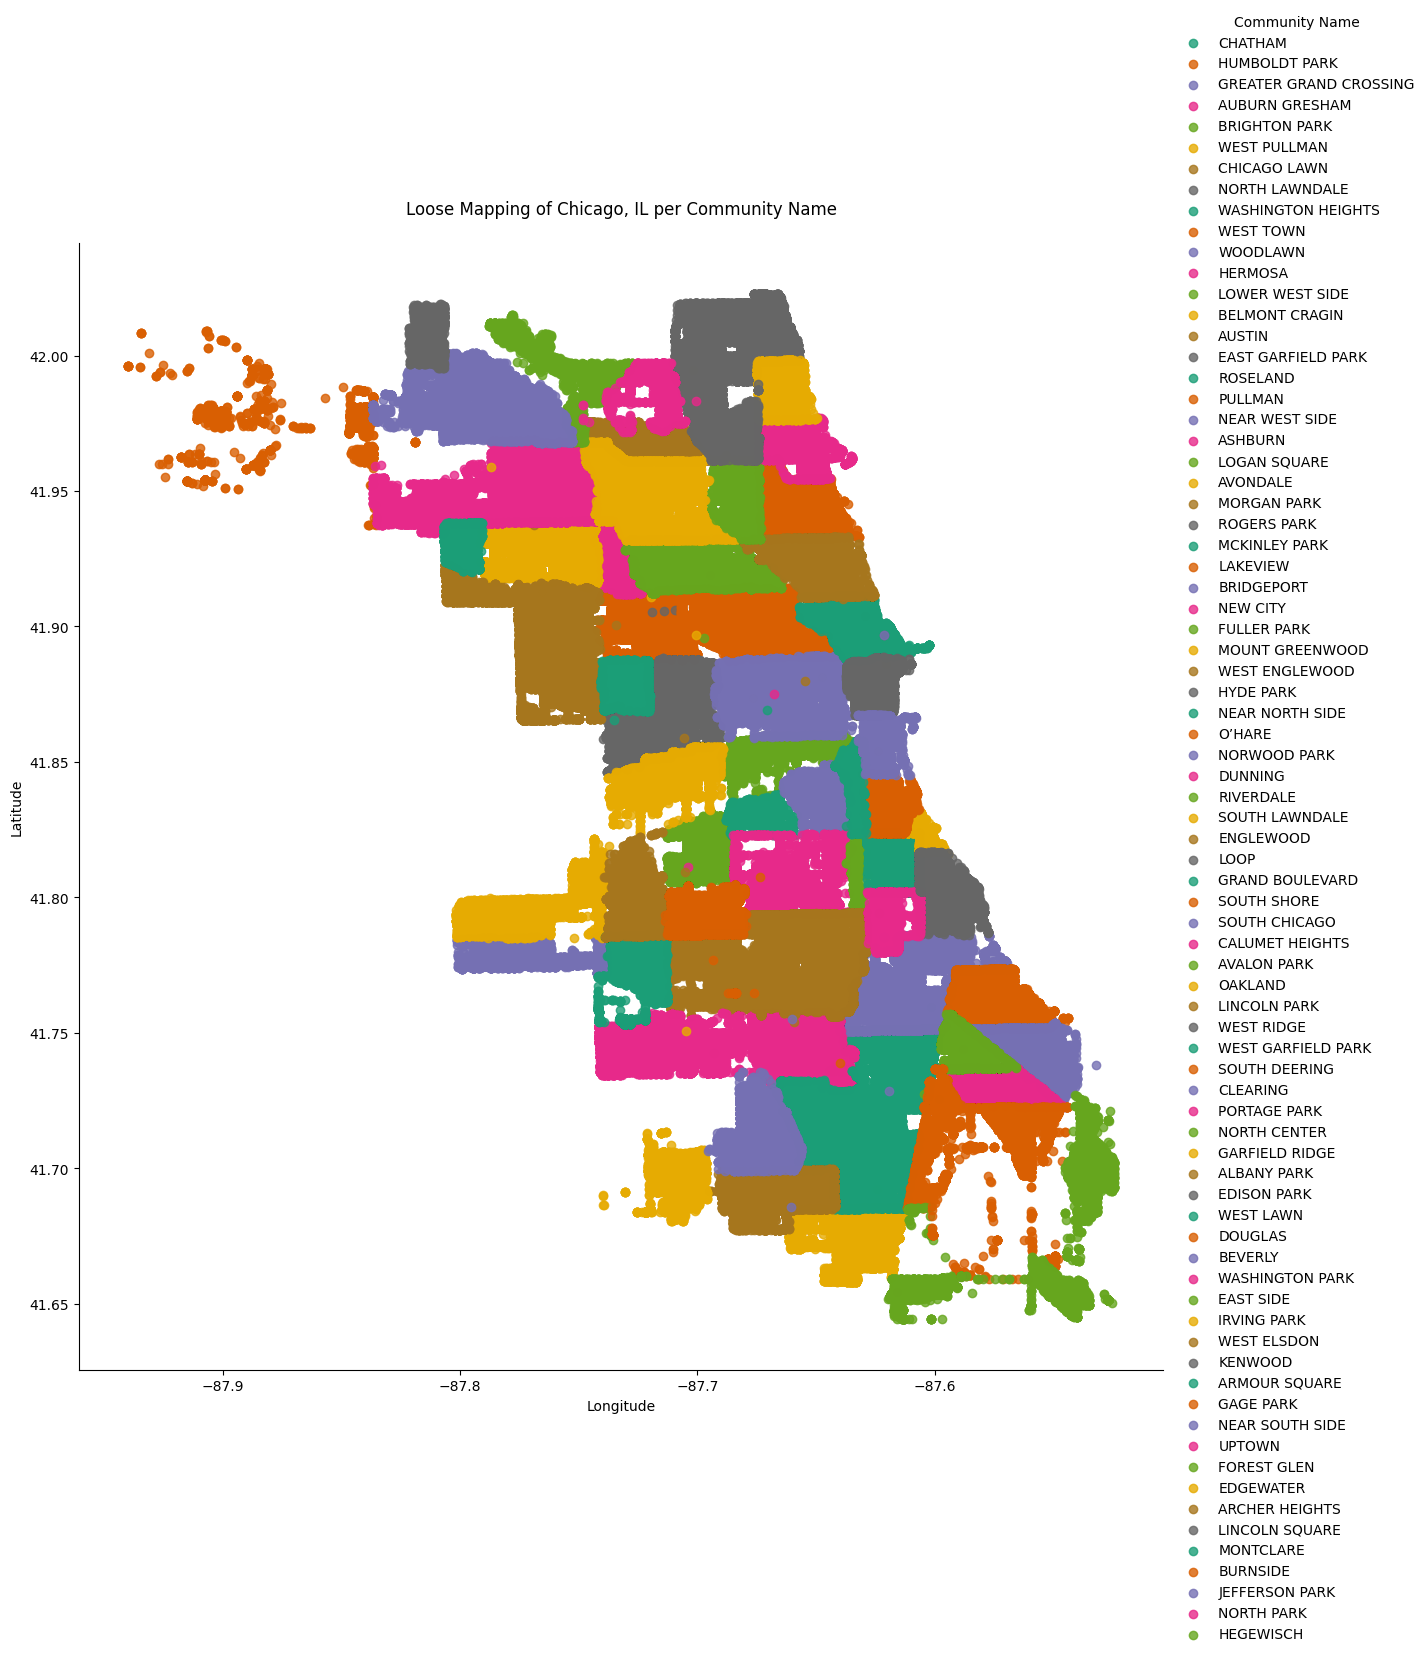

In [16]:
sb.lmplot(data=crime,
           x= 'Longitude',
           y= 'Latitude',
           fit_reg=False,
           hue="Community Name",
           palette='Dark2',
           height=12,
           ci=2)
ax = plt.gca()
ax.set_title("Loose Mapping of Chicago, IL per Community Name\n")


In [17]:
crime

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Community Name
0,11662417,JC232642,04/21/2019 12:30:00 PM,009XX E 80TH ST,031A,ROBBERY,ARMED - HANDGUN,RESIDENCE,False,False,...,44.0,03,1184044.0,1852159.0,2019,09/14/2023 03:41:59 PM,41.749500,-87.601157,"(41.749500329, -87.6011574)",CHATHAM
1,12990873,JG161829,08/17/2019 01:14:00 PM,008XX N KARLOV AVE,1751,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,True,True,...,23.0,17,1148899.0,1905351.0,2019,09/14/2023 03:41:59 PM,41.896215,-87.728572,"(41.89621515, -87.728572048)",HUMBOLDT PARK
4,11765926,JC358692,07/21/2019 02:00:00 PM,002XX W 87TH ST,0810,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,44.0,06,1176436.0,1847222.0,2019,09/15/2023 03:41:25 PM,41.736127,-87.629184,"(41.736126864, -87.629184056)",CHATHAM
5,11885224,JC502442,11/05/2019 08:00:00 PM,075XX S RHODES AVE,031A,ROBBERY,ARMED - HANDGUN,STREET,False,True,...,69.0,03,1181207.0,1855239.0,2019,09/15/2023 03:41:25 PM,41.758018,-87.611459,"(41.75801796, -87.611458525)",GREATER GRAND CROSSING
9,11842146,JC449875,09/26/2019 08:53:00 PM,083XX S SANGAMON ST,0650,BURGLARY,HOME INVASION,RESIDENCE,False,True,...,71.0,05,1171415.0,1849590.0,2019,09/17/2023 03:41:45 PM,41.742736,-87.647510,"(41.742736236, -87.647510047)",AUBURN GRESHAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922190,27038,JF387886,09/08/2022 10:50:00 AM,061XX N WINTHROP AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PORCH,True,False,...,77.0,01A,1167747.0,1940929.0,2022,12/29/2022 03:40:26 PM,41.993457,-87.658318,"(41.993457327, -87.658318065)",EDGEWATER
922191,26819,JF275138,06/10/2022 11:41:00 PM,018XX S CANAL ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,31.0,01A,1173423.0,1891309.0,2022,09/19/2022 03:41:05 PM,41.857173,-87.638918,"(41.857173304, -87.638917814)",LOWER WEST SIDE
922192,26601,JF132803,02/03/2022 04:27:00 PM,000XX E 100TH PL,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,...,49.0,01A,1178641.0,1838358.0,2022,09/19/2022 03:41:05 PM,41.711753,-87.621374,"(41.711753121, -87.621374343)",ROSELAND
922193,26857,JF290575,06/23/2022 02:25:00 AM,027XX S KEDVALE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,30.0,01A,1149162.0,1885416.0,2022,09/01/2022 03:42:17 PM,41.841506,-87.728122,"(41.841506072, -87.728122297)",SOUTH LAWNDALE


In [18]:
crime2019 = crime[crime["Year"] == 2019]
crime2020 = crime[crime["Year"] == 2020]
crime2021 = crime[crime["Year"] == 2021]
crime2022 = crime[crime["Year"] == 2022]

In [19]:
crimeloc2019 = crime2019.groupby(["Community Name", "Year"]).size().reset_index(name="Crime Count")
crimeloc2020 = crime2020.groupby(["Community Name", "Year"]).size().reset_index(name="Crime Count")
crimeloc2021 = crime2021.groupby(["Community Name", "Year"]).size().reset_index(name="Crime Count")
crimeloc2022 = crime2022.groupby(["Community Name", "Year"]).size().reset_index(name="Crime Count")

In [20]:
crimeloc2019

,Community Name,Year,Crime Count
0,ALBANY PARK,2019,2195
1,ARCHER HEIGHTS,2019,803
2,ARMOUR SQUARE,2019,1015
3,ASHBURN,2019,2321
4,AUBURN GRESHAM,2019,7563
...,...,...,...
72,WEST LAWN,2019,1684
73,WEST PULLMAN,2019,3834
74,WEST RIDGE,2019,3416
75,WEST TOWN,2019,7117


In [21]:
zest["RegionName"] = zest['RegionName'].str.upper()

zest = zest[['RegionName', 'State', 'City', "Metro", "CountyName", "2019-01-31", "2020-01-31", "2021-01-31", "2022-01-31"]]
zest.columns = ['RegionName', 'State', 'City', "Metro", "CountyName", "2019", "2020", "2021", "2022"]

zest2019 = zest[['RegionName', 'State', 'City', "Metro", "CountyName", "2019"]]
zest2020 = zest[['RegionName', 'State', 'City', "Metro", "CountyName", "2020"]]
zest2021 = zest[['RegionName', 'State', 'City', "Metro", "CountyName", "2021"]]
zest2022 = zest[['RegionName', 'State', 'City', "Metro", "CountyName", "2022"]]

In [22]:
def pricename(zestdf):
    zestdf.columns = ['RegionName', 'State', 'City', "Metro", "CountyName", "Price"]
    return zestdf

zest2019 = pricename(zest2019)
zest2020 = pricename(zest2020)
zest2021 = pricename(zest2021)
zest2022 = pricename(zest2022)

In [23]:
crimeprice2019 = pd.merge(zest2019, crimeloc2019, left_on='RegionName', right_on='Community Name', how='right')
crimeprice2020 = pd.merge(zest2020, crimeloc2020, left_on='RegionName', right_on='Community Name', how='right')
crimeprice2021 = pd.merge(zest2021, crimeloc2021, left_on='RegionName', right_on='Community Name', how='right')
crimeprice2022 = pd.merge(zest2022, crimeloc2022, left_on='RegionName', right_on='Community Name', how='right')

In [24]:
crimeprice_by_year = pd.concat([crimeprice2019, crimeprice2020, crimeprice2021, crimeprice2022], axis = 0)
crimeprice_by_year

,RegionName,State,City,Metro,CountyName,Price,Community Name,Year,Crime Count
0,ALBANY PARK,IL,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,268510.896216,ALBANY PARK,2019,2195
1,ARCHER HEIGHTS,IL,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,195294.314201,ARCHER HEIGHTS,2019,803
2,NaN,NaN,NaN,NaN,NaN,NaN,ARMOUR SQUARE,2019,1015
3,ASHBURN,IL,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166744.743026,ASHBURN,2019,2321
4,NaN,NaN,NaN,NaN,NaN,NaN,AUBURN GRESHAM,2019,7563
...,...,...,...,...,...,...,...,...,...
72,WEST LAWN,IL,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,245543.885685,WEST LAWN,2022,1581
73,WEST PULLMAN,IL,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,128152.602291,WEST PULLMAN,2022,3344
74,WEST RIDGE,IL,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,228315.313422,WEST RIDGE,2022,3897
75,WEST TOWN,IL,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,504091.764501,WEST TOWN,2022,7044


In [25]:
chicago = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))


In [26]:
chicago.head()

,community,NID,POP2010,POP2000,POPCH,POPPERCH,popplus,popneg,geometry
0,DOUGLAS,35,18238,26470,-8232,-31.099358,0,1,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,36,5918,6110,-192,-3.142390,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,37,2876,3420,-544,-15.906433,0,1,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."
3,GRAND BOULEVARD,38,21929,28006,-6077,-21.698922,0,1,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
4,KENWOOD,39,17841,18363,-522,-2.842673,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."


In [27]:
chicago2019 = pd.merge(chicago, crimeprice2019, right_on="Community Name", left_on ="community", how = "left")

In [28]:
chicago2019.head(3)

,community,NID,POP2010,POP2000,POPCH,POPPERCH,popplus,popneg,geometry,RegionName,State,City,Metro,CountyName,Price,Community Name,Year,Crime Count
0,DOUGLAS,35,18238,26470,-8232,-31.099358,0,1,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",NaN,NaN,NaN,NaN,NaN,NaN,DOUGLAS,2019.0,2704.0
1,OAKLAND,36,5918,6110,-192,-3.142390,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...",OAKLAND,IL,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,313238.590571,OAKLAND,2019.0,628.0
2,FULLER PARK,37,2876,3420,-544,-15.906433,0,1,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ...",FULLER PARK,IL,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,81802.553830,FULLER PARK,2019.0,902.0


In [29]:
chicago2019 = chicago2019[["RegionName", "State", "City", "Price", "Year", "Crime Count", "community", "NID", "geometry", "POP2010"]]
chicago2019.columns = ["RegionName", "State", "City", "Price", "Year", "Crime_Count", "community", "NID", "geometry", "POP2010"]
chicago2019

,RegionName,State,City,Price,Year,Crime_Count,community,NID,geometry,POP2010
0,NaN,NaN,NaN,NaN,2019.0,2704.0,DOUGLAS,35,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",18238
1,OAKLAND,IL,Chicago,313238.590571,2019.0,628.0,OAKLAND,36,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...",5918
2,FULLER PARK,IL,Chicago,81802.553830,2019.0,902.0,FULLER PARK,37,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ...",2876
3,NaN,NaN,NaN,NaN,2019.0,3348.0,GRAND BOULEVARD,38,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ...",21929
4,KENWOOD,IL,Chicago,307077.225358,2019.0,1360.0,KENWOOD,39,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...",17841
...,...,...,...,...,...,...,...,...,...,...
72,MOUNT GREENWOOD,IL,Chicago,229346.063785,2019.0,468.0,MOUNT GREENWOOD,74,"MULTIPOLYGON (((-87.69646 41.70714, -87.69644 ...",19093
73,MORGAN PARK,IL,Chicago,136925.069434,2019.0,1859.0,MORGAN PARK,75,"MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ...",22544
74,NaN,NaN,NaN,NaN,NaN,NaN,OHARE,76,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ...",12756
75,EDGEWATER,IL,Chicago,192986.371594,2019.0,2459.0,EDGEWATER,77,"MULTIPOLYGON (((-87.65456 41.99817, -87.65456 ...",56521


<Axes: >

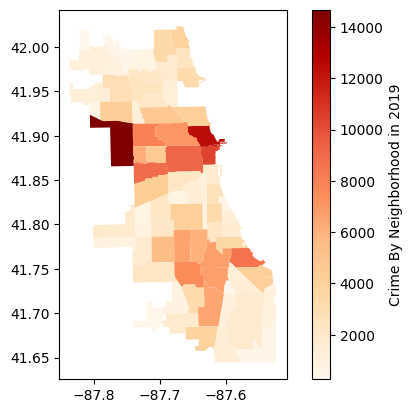

In [30]:
chicago2019.plot(
    column="Crime_Count",
    legend=True,
    legend_kwds={"label": "Crime By Neighborhood in 2019", "orientation": "vertical"},
    cmap='OrRd'
)

<Axes: >

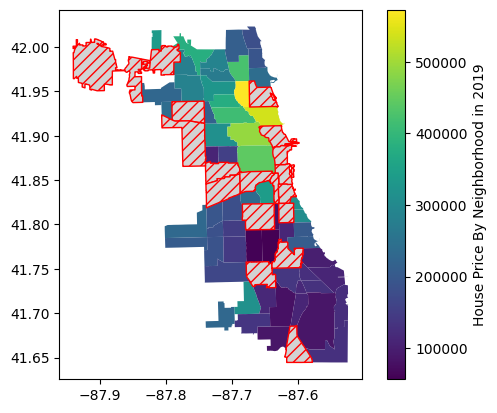

In [31]:
chicago2019.plot(
    column="Price",
    legend=True,
    legend_kwds={"label": "House Price By Neighborhood in 2019", "orientation": "vertical"},
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
)

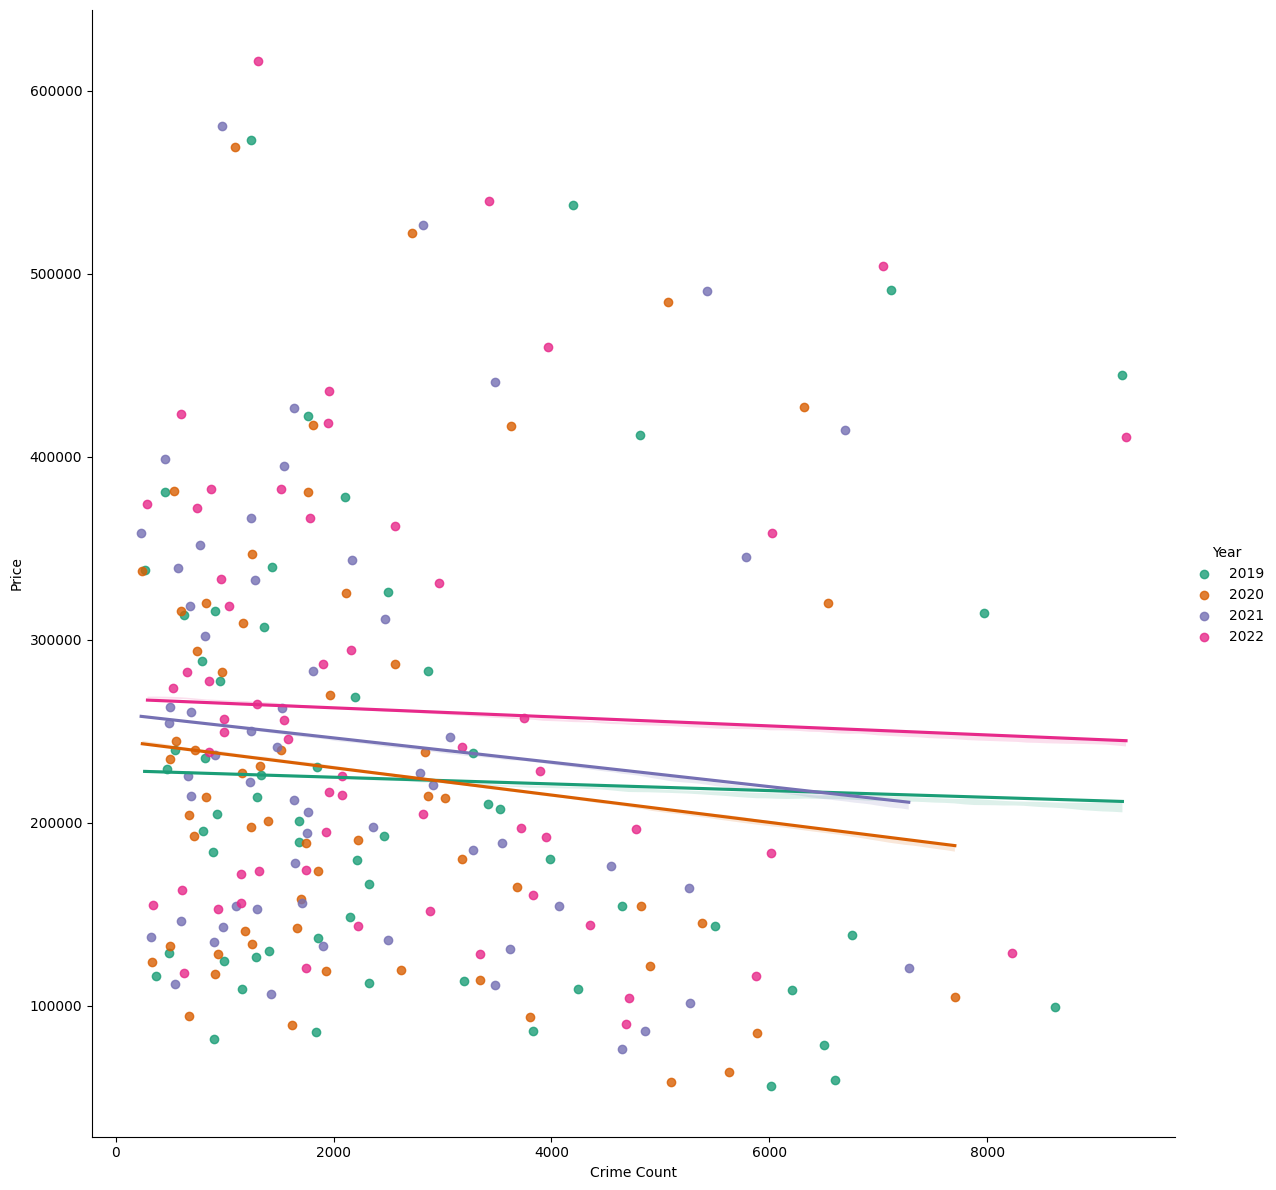

In [32]:
crimevspricescatterplot = sb.lmplot(data=crimeprice_by_year,
           x= 'Crime Count',
           y= 'Price',
           fit_reg=True,
           hue="Year",
           palette='Dark2',
           height=12,
           ci=2)